# J002 ASSIGNMENT NLP

## SPAM DETECTION

### Importing Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Text preprocessing
import nltk as nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Reading and viewing the data

In [2]:
data = pd.read_csv('/Users/home/Downloads/spam.csv',encoding="ISO-8859-1")

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### 1. Exploratory Data Analysis and preprocessing :

#### 1. Data shape and variable datatypes

In [4]:
data.shape

(5572, 5)

In [5]:
data.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

#### 2. Handling null values

In [6]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

##### The columns Unnamed: 2, Unnamed: 3 and Unnamed: 4 have null values

In [7]:
data.isnull().sum()*100/data.shape[0]

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

##### The columns Unnamed: 2, Unnamed: 3 and Unnamed: 4 have null values greater than 99% so we drop them

In [8]:
data=data.drop(data.columns[[2,3,4]],axis=1)

##### The new data now looks like:

In [9]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


##### Column v1 is the outcome and v2 is the predictor so we rename them to X and Y

In [10]:
data.columns = ['Y' , 'X']

#### 4. Checking the distribution of the target variable

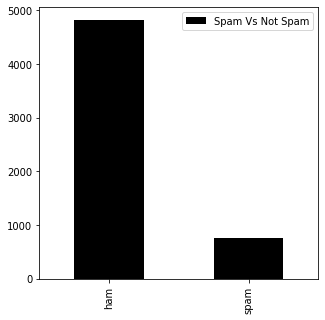

In [11]:
plt.figure(figsize=(5,5))
data['Y'].value_counts().plot(kind='bar',color='black',label='Spam Vs Not Spam')
plt.legend();

#### 5. Preprocessing 1 - identifying stopwords, punctuations and creating a corpus

In [12]:
trashitems = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = data['X'].tolist()

In [13]:
corpus[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [14]:
len(corpus)

5572

#### 5. Preprocessing 2 - Modifying the corpus

In [15]:
final_corpus = []
for i in range(len(corpus)):
    word = word_tokenize(corpus[i].lower())
    word = [stemmer.stem(y) for y in word if y not in trashitems]
    j = " ".join(word)
    final_corpus.append(j)

#### 5. Preprocessing 3 - TF IDF Vectorization

In [16]:
x=data['X']
y=data['Y']

In [17]:
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(x)
x = vector.toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 2. Model building

#### 1. Train test split (80:20)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

#### 2. Model building 1 - Multinomial Naive Bayes

In [19]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### 2. Model prediction 1 - Multinomial Naive Bayes

In [20]:
ypredmnb = mnb.predict(x_train)
ypredmnb

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

#### 2. Model evaluation 1 - Multinomial Naive Bayes

##### 2.1. Accuracy score

In [21]:
print(accuracy_score(y_train,ypredmnb)*100, '%')

96.99349338119812 %


##### 2.2. Confusion Matrix

In [22]:
cnf_mnb = confusion_matrix(y_train,ypredmnb)
print(cnf_mnb)

[[3876    0]
 [ 134  447]]


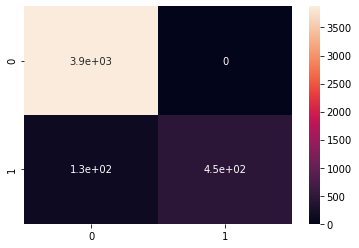

In [23]:
sns.heatmap(cnf_mnb, annot=True);

##### 2.3. Classification report

In [24]:
print(classification_report(y_train,ypredmnb))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3876
        spam       1.00      0.77      0.87       581

    accuracy                           0.97      4457
   macro avg       0.98      0.88      0.93      4457
weighted avg       0.97      0.97      0.97      4457



#### 3. Model building 2 - Linear Support Vector Classifier

In [25]:
svc = LinearSVC().fit(x_train,y_train)

#### 3. Model prediction 2 - Linear Support Vector Classifier

In [26]:
ypred_svc = svc.predict(x_train)

#### 3. Model evaluation 2 - Linear Support Vector Classifier

##### 3.1. Accuracy score

In [27]:
print(accuracy_score(y_train,ypred_svc)*100, '%')

99.95512676688355 %


##### 3.2. Confusion Matrix

In [28]:
cnf_svc = confusion_matrix(y_train,ypred_svc)
print(cnf_svc)

[[3876    0]
 [   2  579]]


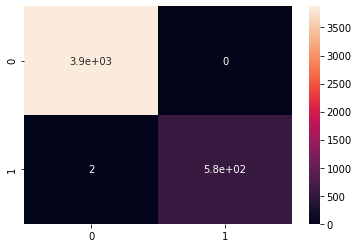

In [29]:
sns.heatmap(cnf_svc, annot=True);

##### 3.3. Classification report

In [30]:
print(classification_report(y_train,ypred_svc))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3876
        spam       1.00      1.00      1.00       581

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457



#### 4. Model building 3 - XG Boost

In [31]:
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### 4. Model prediction 3 - XG Boost

In [32]:
ypred_xgb = clf.predict(x_train)
ypred_xgb

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

#### 4. Model evaluation 3 - XG Boost

##### 4.1. Accuracy score

In [33]:
print(accuracy_score(y_train,ypred_xgb))

0.99798070450976


##### 4.2. Confusion matrix

In [34]:
cnf_xgb = confusion_matrix(y_train,ypred_xgb)
cnf_xgb

array([[3876,    0],
       [   9,  572]])

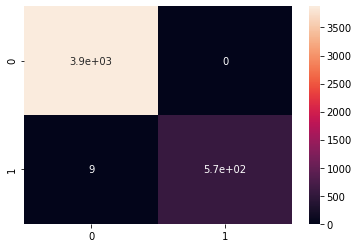

In [35]:
sns.heatmap(cnf_xgb, annot=True);

##### 4.3. Classification report

In [36]:
print(classification_report(y_train,ypred_xgb))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3876
        spam       1.00      0.98      0.99       581

    accuracy                           1.00      4457
   macro avg       1.00      0.99      1.00      4457
weighted avg       1.00      1.00      1.00      4457

